# Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [3]:
from scipy import stats 
import numpy as np

In [4]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

**First T test**

*One sample t-test*

Check if the mean of the GPU1 is equal to zero.
- Null Hypothesis is that mean is equal to zero.
- Alternate hypothesis is that it is not equal to zero.

In [5]:
#H0 : μ = 0
#𝐻𝐴 : μ not equal to 0
from scipy.stats             import ttest_1samp,ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot     as     plt
n = len(GPU1)
mu=0
xbar=GPU1.mean()
print("Sample mean",np.mean(GPU1))
s = np.std(GPU1, ddof = 1)
se = s/np.sqrt(n)
print("Critical Values: ", stats.t.isf(0.025,df=n-1,loc=mu,scale=se), "&", stats.t.isf(0.975,df=n-1,loc=mu,scale=se))

Sample mean 10.333333333333334
Critical Values:  0.6507704546500327 & -0.6507704546500326


In [6]:
print("Observed sample mean is in the Critical Region. Hence reject Null")

Observed sample mean is in the Critical Region. Hence reject Null


In [7]:
print("xbar", xbar)
print("n",n)
print("mu",mu)
print("se",se)
#print("P Value: ", stats.t.cdf(xbar,df=n-1,loc=mu,scale=se)*2)

xbar 10.333333333333334
n 15
mu 0
se 0.3034196632775998


In [8]:
print("T-Statistic")
print((xbar-mu)/se)
print("Using functions")
print(ttest_1samp(GPU1, 0))

T-Statistic
34.056241516158195
Using functions
Ttest_1sampResult(statistic=34.056241516158195, pvalue=7.228892044970457e-15)


P value is 7.22e-15 which is less than 5% level of significance
So the statistical decision is to reject the null hypothesis at 5% level of significance.
So there is sufficient evidence to prove that the mean is higher than zero

## Question 2

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

* $H_0$: $\mu1$        = $\mu2$ 
* $H_a$: $\mu1$ $\neq$ $\mu2$ 

In [9]:
t_statistic, p_value  =  stats.ttest_ind(GPU1,GPU2)
print('P Value %1.3f' % p_value)  

P Value 0.014


Here the P value is 1.4% which is less than 5% level of significance
So the statistical decision is to reject the null hypothesis at 5% level of signance. We conclude there is a significant difference between the two datasets GPU1 and GPU2

## Question 3

He is trying a third GPU - GPU3.

In [10]:
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [11]:
t_statistic, p_value  =  stats.ttest_ind(GPU1,GPU3)
print('P Value %1.3f' % p_value)  

P Value 0.145


Here the P value is 1.45% which is less than 5% level of significance
So the statistical decision is to reject the null hypothesis at 5% level of signance. We conclude there is a significant difference between the two datasets GPU1 and GPU3

## ANOVA

## Question 4 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [12]:
import numpy as np
import pandas as  pd

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

Count, Mean, standard deviation and Variance for e1:   4, 0.75, 0.87 and 0.57
Count, Mean, standard deviation and Variance for e2:   4, 1.70, 0.67 and 0.33
Count, Mean, standard deviation and Variance for e3:   4, 0.74, 0.47 and 0.17


#### Answer:

In [17]:

print('Count, Mean, standard deviation and Variance for e1: %3d, %3.2f, %3.2f and %3.2f' % (len(e1), e1.mean(),np.std(e1,ddof =1),np.var(e1)))
print('Count, Mean, standard deviation and Variance for e2: %3d, %3.2f, %3.2f and %3.2f' % (len(e2), e2.mean(),np.std(e2,ddof =1),np.var(e2)))
print('Count, Mean, standard deviation and Variance for e3: %3d, %3.2f, %3.2f and %3.2f' % (len(e3), e3.mean(),np.std(e3,ddof =1),np.var(e3)))

mean_e = pd.DataFrame()

df1            = pd.DataFrame({'Exp': 'e1', 'Result':e1})
df2            = pd.DataFrame({'Exp': 'e2', 'Result':e2})
df3            = pd.DataFrame({'Exp': 'e3', 'Result':e3})

mean_e = mean_e.append(df1) 
mean_e = mean_e.append(df2) 
mean_e = mean_e.append(df3) 

Count, Mean, standard deviation and Variance for e1:   4, 0.75, 0.87 and 0.57
Count, Mean, standard deviation and Variance for e2:   4, 1.70, 0.67 and 0.33
Count, Mean, standard deviation and Variance for e3:   4, 0.74, 0.47 and 0.17


In [14]:
mean_e

,Exp,Result
0,e1,1.595440
1,e1,1.419730
2,e1,0.000000
3,e1,0.000000
0,e2,1.433800
1,e2,2.079700
2,e2,0.892139
3,e2,2.384740
0,e3,0.036930
1,e3,0.938018


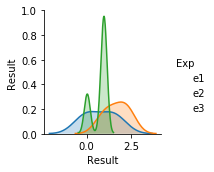

In [15]:
import seaborn as sns
sns.pairplot(mean_e,diag_kind='kde',hue='Exp')
plt.show()

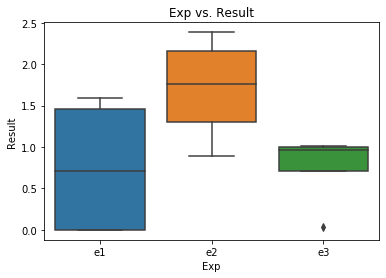

In [20]:
sns.boxplot(x = "Exp", y = "Result", data = mean_e)
plt.title('Exp vs. Result')
plt.show()

Perform levene test on the data

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

source: scipy.org

Levene's  test
* $H_0$: Variances  are  equal
* $H_A$: Variances are different 

    we select 𝛼 = 0.05 

In [18]:
from scipy.stats import levene
levene(e1,e2,e3)

LeveneResult(statistic=2.6741725711150446, pvalue=0.12259792666001798)

P value 0.1225 is greater than $\alpha$ which means the Hull hypothesis  cannot be rejected.So we accept the null hypothesis that the variances are equal.

ANOVA test
* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

    we select 𝛼 = 0.05 

In [19]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Result ~ Exp', data = mean_e).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq   df         F    PR(>F)
Exp       2.399066  2.0  2.513576  0.135746
Residual  4.294994  9.0       NaN       NaN


Sice P Value is 13.5% which is very higher than 𝛼(5%), we  fail to  reject the null hypothesis which means we statistically conclude the 3 experiments are significantly similiar

## Question 5

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

In [21]:
from scipy.stats import f_oneway
stat, p = f_oneway(e1, e2, e3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=2.514, p=0.136
Probably the same distribution


## Question 6

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

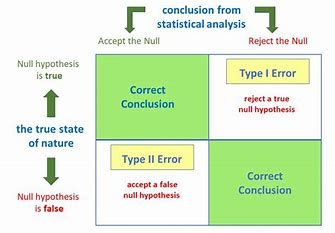

Type I Error:

> Rejection of a null hypothesis that is actually true

> This is equivalent to false positive

> Error  of  first kind

> Alpha is the maximum probability that we have type I error

Type II Error:

> This type of error occurs when do not reject a null hypothesis that is false

> This is equivalent to false negative

> Error of second kind

> Probability of Type II error is denoted by Beta. This number is related to the power or sensitivity of the hypothesis test, denoted by 1 – beta.

## Question 7 

You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

#### Answer:


Null Hypothesis: Waiting time to place order has not changed significantly in the past month

Alternate Hypothesis: Waiting time has changes significantly
* $\mu0$ = 4.5 ---> previous population mean
* $\mu1$ ---> new mean
* $H_0$: $\mu1$ = 4.5
* $H_A$: $\mu1$ != 4.5

## Chi square test

## Question 8

Let's create a small dataset for dice rolls of four players

In [22]:
import numpy as np

d1 = [5, 8, 3, 8]
d2 = [9, 6, 8, 5]
d3 = [8, 12, 7, 2]
d4 = [4, 16, 7, 3]
d5 = [3, 9, 6, 5]
d6 = [7, 2, 5, 7]

dice = np.array([d1, d2, d3, d4, d5, d6])

run the test using SciPy Stats library

Depending on the test, we are generally looking for a threshold at either 0.05 or 0.01. Our test is significant (i.e. we reject the null hypothesis) if we get a p-value below our threshold.

For our purposes, we’ll use 0.01 as the threshold.

use stats.chi2_contingency() module 

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

Print the following:

- chi2 stat
- p-value
- degree of freedom
- contingency



In [37]:
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(dice)

print('Chi-square statistic: %3.5f \nP value: %1.6f \nDegrees of freedom: %d' %(chi_sq_Stat, p_value,deg_freedom))
print('Contingency')
print(exp_freq)

Chi-square statistic: 23.31567 
P value: 0.077664 
Degrees of freedom: 15
Contingency
[[ 5.57419355  8.20645161  5.57419355  4.64516129]
 [ 6.50322581  9.57419355  6.50322581  5.41935484]
 [ 6.73548387  9.91612903  6.73548387  5.61290323]
 [ 6.96774194 10.25806452  6.96774194  5.80645161]
 [ 5.34193548  7.86451613  5.34193548  4.4516129 ]
 [ 4.87741935  7.18064516  4.87741935  4.06451613]]


In [51]:
print("P value is 7.76% which is way higher than the alpha which is 1%, so we accept the Null Hypothesis.")

P value is 7.76% which is way higher than the alpha which is 1%, so we accept the Null Hypothesis.


## Question 9

### Z-test

Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

In [41]:
z_array = stats.zscore(dice)
print(z_array)

[[-0.46291005 -0.18884739 -1.83711731  1.44115338]
 [ 1.38873015 -0.64208114  1.22474487  0.        ]
 [ 0.9258201   0.7176201   0.61237244 -1.44115338]
 [-0.9258201   1.62408759  0.61237244 -0.96076892]
 [-1.38873015  0.03776948  0.          0.        ]
 [ 0.46291005 -1.54854863 -0.61237244  0.96076892]]


In [49]:
p_value_array = stats.norm.cdf(z_array)
print("P-values: \n", p_value_array)
print("Mean of the p-value array :")
print(p_value_array.mean())

P-values: 
 [[0.32171442 0.42510621 0.03309629 0.92522932]
 [0.91754259 0.26041025 0.88966432 0.5       ]
 [0.82273026 0.76350422 0.72985431 0.07477068]
 [0.17726974 0.94782144 0.72985431 0.16833418]
 [0.08245741 0.51506426 0.5        0.5       ]
 [0.67828558 0.06074513 0.27014569 0.83166582]]
Mean of the p-value array :
0.505219434874248


In [50]:
print("P value 0.5052  is greater than the alpha value 0.01 hence we accept the Null hypothesis")

P value 0.5052  is greater than the alpha value 0.01 hence we accept the Null hypothesis


## Question 10

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. 
In some cases, you might be interested in testing differences between samples of the same group at different points in time. 
We can conduct a paired t-test using the scipy function stats.ttest_rel(). 

In [61]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)
print("before: ")
print(before, "\n")
print("after: ")
print(after)

before: 
[ 71.97267373 144.46485144 108.38727924 138.12156381 134.02302185
  79.50709284 109.50737057 106.22420032  86.40699463 123.80771951
  94.17713034 110.03324076 110.86323799  89.91639048  54.62688323
 128.80067856 111.09831068  58.11920831 113.14878157  61.21892606
 101.7786211  107.47006059  18.32820512 105.95326646  84.31208784
  92.85497197  50.75795792  85.39925559 107.67127991 106.30395235
  39.39767411  72.69364832 113.52057125 102.08755717 119.7099271
 139.84117293  66.68309918  77.22944811 173.6639425  174.3546779
 103.6086664   89.26928184 122.05692903 116.54594671 134.82478028
  81.52990654  61.2698747   85.12577426 128.65923762 115.94889872
  68.79801685 133.0318796  112.26778064 119.34887594 126.53516682
 131.62778567 105.60716422  72.46205847 136.91157888 162.54717006
  94.56787189  58.8506452  142.38715656 107.27663379  50.22220901
  99.94217872  49.93156117  59.30441152  87.8593045  115.10551626
  91.07294487  87.33905133 180.31264976 144.2908555  177.4795658
 138

Test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment using above data.

* $H_0$: $\mu{After}$ - $\mu{Before}$ =  0
* $H_A$: $\mu{After}$ - $\mu{Before}$ $\neq$  0

In [63]:
print("mean of before: ", before.mean())
print("mean of after: ", after.mean())

mean of before:  98.56627499276424
mean of after:  96.92596030687028


In [64]:
t_statistic, p_value  =  stats.ttest_rel(after, before )
print('P Value %1.3f' % p_value)  

P Value 0.000


P-value is 0% which is very less than alpha 5% hence we reject Null hypothesis and we say the samples are significantly different